# House Prices - Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Veri Analizi

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
def missing_values_table(dataframe,na_name=False):
    na_columns=[col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    n_miss=dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio=(dataframe[na_columns].isnull().sum() / dataframe.shape[0]*100).sort_values(ascending=True)
    missing_df=pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=["n_miss","ratio"])
    print(missing_df,end="\n")
    if na_name:
        return na_columns

In [8]:
missing_values_table(train_data)

              n_miss  ratio
PoolQC          1453  99.52
MiscFeature     1406  96.30
Alley           1369  93.77
Fence           1179  80.75
MasVnrType       872  59.73
FireplaceQu      690  47.26
LotFrontage      259  17.74
GarageType        81   5.55
GarageYrBlt       81   5.55
GarageFinish      81   5.55
GarageQual        81   5.55
GarageCond        81   5.55
BsmtFinType2      38   2.60
BsmtExposure      38   2.60
BsmtFinType1      37   2.53
BsmtCond          37   2.53
BsmtQual          37   2.53
MasVnrArea         8   0.55
Electrical         1   0.07


In [9]:
missing_values_table(test_data)

              n_miss  ratio
PoolQC          1456  99.79
MiscFeature     1408  96.50
Alley           1352  92.67
Fence           1169  80.12
MasVnrType       894  61.27
FireplaceQu      730  50.03
LotFrontage      227  15.56
GarageCond        78   5.35
GarageYrBlt       78   5.35
GarageQual        78   5.35
GarageFinish      78   5.35
GarageType        76   5.21
BsmtCond          45   3.08
BsmtExposure      44   3.02
BsmtQual          44   3.02
BsmtFinType1      42   2.88
BsmtFinType2      42   2.88
MasVnrArea        15   1.03
MSZoning           4   0.27
BsmtFullBath       2   0.14
BsmtHalfBath       2   0.14
Functional         2   0.14
Utilities          2   0.14
GarageCars         1   0.07
GarageArea         1   0.07
TotalBsmtSF        1   0.07
KitchenQual        1   0.07
BsmtUnfSF          1   0.07
BsmtFinSF2         1   0.07
BsmtFinSF1         1   0.07
Exterior2nd        1   0.07
Exterior1st        1   0.07
SaleType           1   0.07


In [10]:
train_data=train_data.drop(columns=['Id', 'PoolQC', 'Fence','MSZoning','MiscFeature','Alley'], axis=1)
test_data=test_data.drop(columns=['PoolQC', 'Fence','MSZoning','MiscFeature','Alley'], axis=1)

In [11]:
train_cat_cols=[col for col in train_data.columns if train_data[col].dtype=='object']
train_num_cols=[col for col in train_data.columns if train_data[col].dtype=='int64' or train_data[col].dtype=='float64']

In [12]:
train_cat_cols

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [13]:
test_cat_cols=[col for col in test_data.columns if test_data[col].dtype=='object']
test_num_cols=[col for col in test_data.columns if test_data[col].dtype=='int64' or test_data[col].dtype=='float64']


In [14]:
test_cat_cols

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## Veri Görselleştirme

In [15]:
import DataScienceHelper as dsh

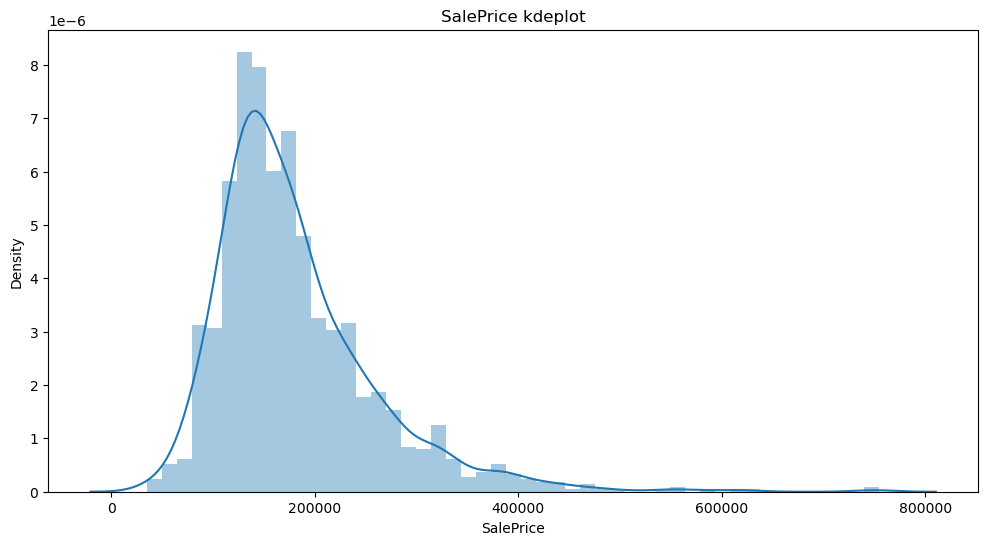

In [16]:
fig = plt.figure(figsize = (12,6))
sns.distplot(train_data["SalePrice"])
plt.title("SalePrice kdeplot")
plt.show()

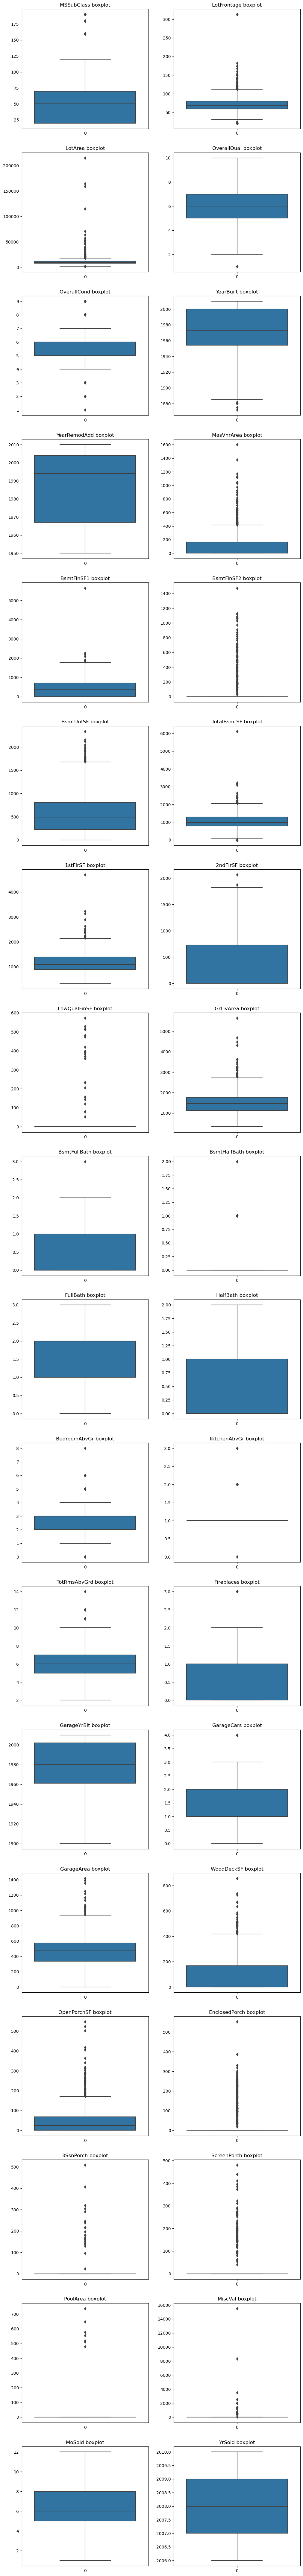

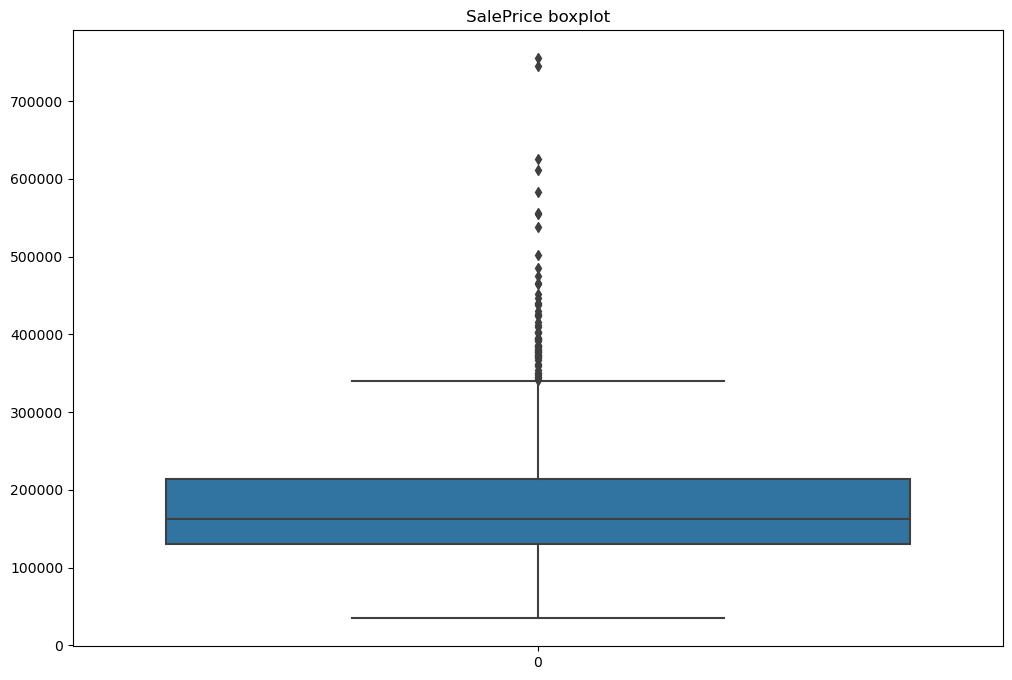

In [17]:
dsh.show_boxplot(train_data,train_num_cols)

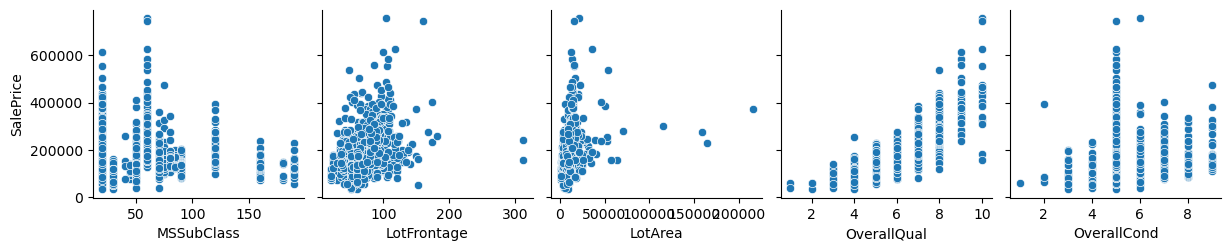

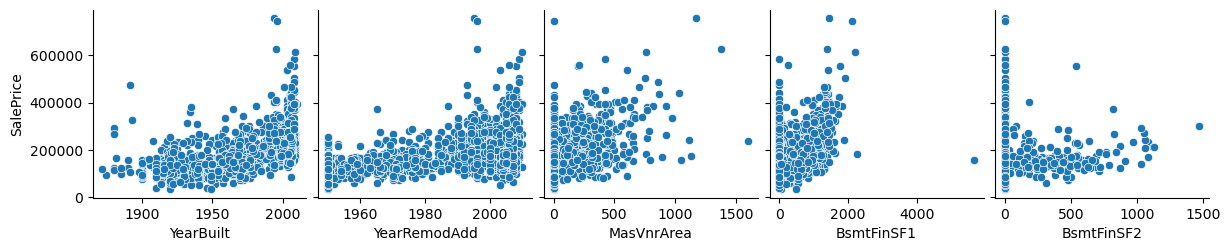

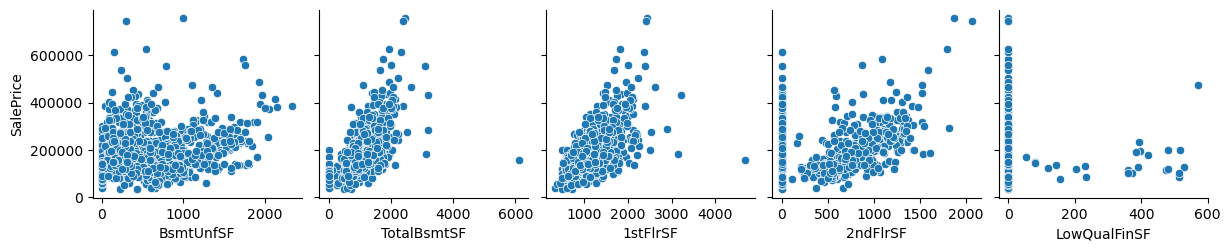

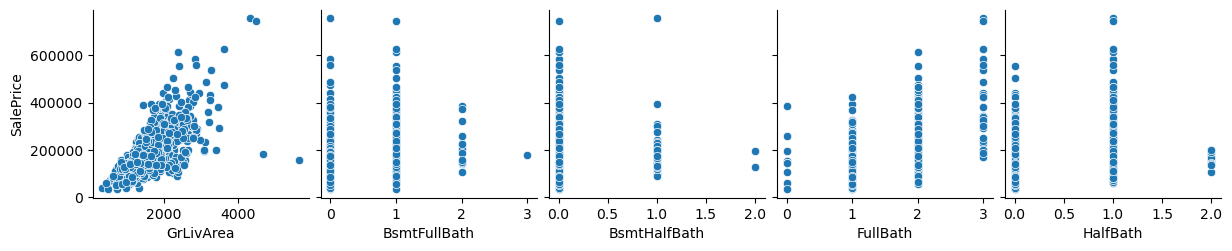

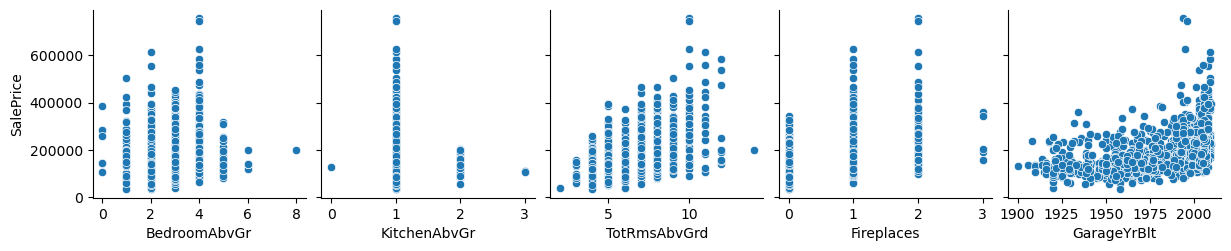

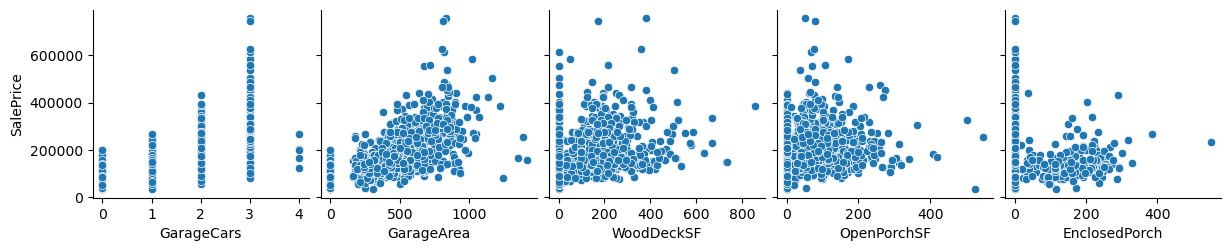

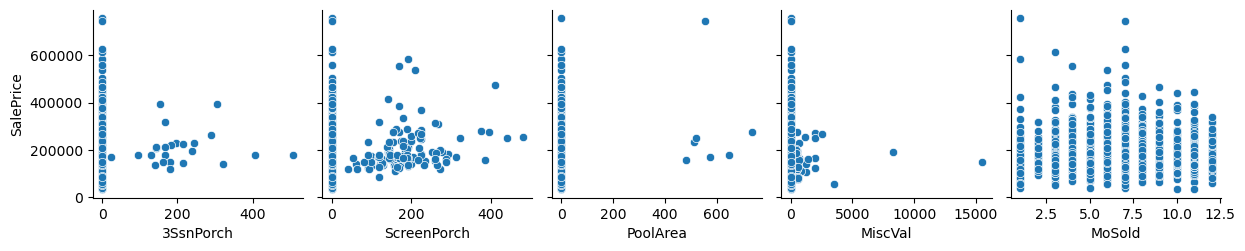

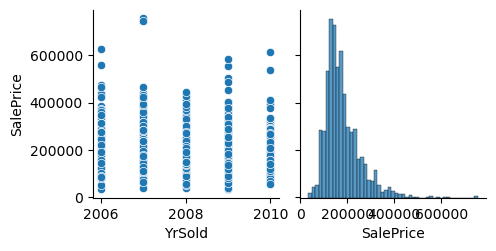

In [18]:
for i in range(0, len(train_data[train_num_cols].columns), 5):
        sns.pairplot(data=train_data[train_num_cols],
                    x_vars=train_data[train_num_cols].columns[i:i+5],
                    y_vars=['SalePrice'])


In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_data[train_num_cols]= scaler.fit_transform(train_data[train_num_cols])
test_data[test_num_cols]= scaler.fit_transform(test_data[test_num_cols])
train_data.head()
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730864,-0.874711,0.510540,0.363929,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,WD,Normal
1,-1.728490,-0.874711,0.555248,0.897861,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,WD,Normal
2,-1.726115,0.061351,0.242297,0.809646,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,WD,Normal
3,-1.723741,0.061351,0.421126,0.032064,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,WD,Normal
4,-1.721367,1.465443,-1.143626,-0.971808,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,WD,Normal


In [20]:
train_get_dummies=pd.get_dummies(train_data,columns=train_cat_cols,drop_first=True)
test_get_dummies=pd.get_dummies(test_data,columns=test_cat_cols,drop_first=True)

In [21]:
train_get_dummies

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,False,False,False,False,True,False,False,False,True,False
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,False,False,False,False,True,False,False,False,True,False
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,False,False,False,False,True,False,False,False,True,False
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,False,False,False,False,True,False,False,False,False,False
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,-0.288653,...,False,False,False,False,True,False,False,False,True,False
1456,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.722112,...,False,False,False,False,True,False,False,False,True,False
1457,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,...,False,False,False,False,True,False,False,False,True,False
1458,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,6.092188,...,False,False,False,False,True,False,False,False,True,False


In [22]:
test_get_dummies

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.510540,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.567170,0.063273,...,False,False,False,False,True,False,False,False,True,False
1,-1.728490,-0.874711,0.555248,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041060,1.063027,...,False,False,False,False,True,False,False,False,True,False
2,-1.726115,0.061351,0.242297,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.567170,0.772989,...,False,False,False,False,True,False,False,False,True,False
3,-1.723741,0.061351,0.421126,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.454535,0.357706,...,False,False,False,False,True,False,False,False,True,False
4,-1.721367,1.465443,-1.143626,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.567170,-0.387166,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.127185,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.567170,-0.965046,...,False,False,False,False,True,False,False,False,True,False
1455,1.723741,2.401505,-2.127185,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.567170,-0.411336,...,False,False,False,False,True,False,False,False,False,False
1456,1.726115,-0.874711,4.087117,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.567170,1.724403,...,False,False,False,False,True,False,False,False,False,False
1457,1.728490,0.646389,-0.294189,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.567170,-0.224568,...,False,False,False,False,True,False,False,False,True,False


In [23]:
train_temp=pd.concat([train_data,train_get_dummies],axis=1)
test_temp=pd.concat([test_data,test_get_dummies],axis=1)

In [24]:
train_temp

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.208034,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,False,False,False,False,True,False,False,False,True,False
1,-0.872563,0.409895,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,False,False,False,False,True,False,False,False,True,False
2,0.073375,-0.084449,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,False,False,False,False,True,False,False,False,True,False
3,0.309859,-0.414011,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,False,False,False,False,True,False,False,False,False,False
4,0.073375,0.574676,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.331620,-0.260560,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,False,False,False,False,True,False,False,False,True,False
1456,-0.872563,0.615871,0.266407,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,False,False,False,False,True,False,False,False,True,False
1457,0.309859,-0.166839,-0.147810,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,False,False,False,False,True,False,False,False,True,False
1458,-0.872563,-0.084449,-0.080160,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,False,False,False,False,True,False,False,False,True,False


In [25]:
test_temp

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.510540,0.363929,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False
1,-1.728490,-0.874711,0.555248,0.897861,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,False,False,True,False,False,False,True,False
2,-1.726115,0.061351,0.242297,0.809646,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False
3,-1.723741,0.061351,0.421126,0.032064,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False
4,-1.721367,1.465443,-1.143626,-0.971808,Pave,IR1,HLS,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.127185,-1.591330,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False
1455,1.723741,2.401505,-2.127185,-1.599808,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,False,False
1456,1.726115,-0.874711,4.087117,2.055150,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,False,False
1457,1.728490,0.646389,-0.294189,0.125527,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False


In [26]:
train=train_temp.drop(train_cat_cols,axis=1)
test=test_temp.drop(test_cat_cols,axis=1)

In [27]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,False,False,False,False,True,False,False,False,True,False
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,False,False,False,False,True,False,False,False,True,False
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,False,False,False,False,True,False,False,False,True,False
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,False,False,False,False,True,False,False,False,False,False
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,False,False,False,False,True,False,False,False,True,False


In [28]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730864,-0.874711,0.510540,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.567170,0.063273,...,False,False,False,False,True,False,False,False,True,False
1,-1.728490,-0.874711,0.555248,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041060,1.063027,...,False,False,False,False,True,False,False,False,True,False
2,-1.726115,0.061351,0.242297,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.567170,0.772989,...,False,False,False,False,True,False,False,False,True,False
3,-1.723741,0.061351,0.421126,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.454535,0.357706,...,False,False,False,False,True,False,False,False,True,False
4,-1.721367,1.465443,-1.143626,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.567170,-0.387166,...,False,False,False,False,True,False,False,False,True,False


In [29]:
x=train.drop(['SalePrice'],axis=1)
y=train['SalePrice'].iloc[:,1]

In [30]:
from sklearn.impute import SimpleImputer
s_imputer=SimpleImputer()
x=s_imputer.fit_transform(x)
test=s_imputer.fit_transform(test)

test

array([[-1.73086406, -0.87471081,  0.51054035, ...,  0.        ,
         1.        ,  0.        ],
       [-1.72848977, -0.87471081,  0.55524755, ...,  0.        ,
         1.        ,  0.        ],
       [-1.72611547,  0.06135085,  0.2422971 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.72611547, -0.87471081,  4.08711696, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.72848977,  0.64638939, -0.29418939, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73086406,  0.06135085,  0.2422971 , ...,  0.        ,
         1.        ,  0.        ]])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1095, 267)
y_train shape: (1095,)
x_test shape: (365, 267)
y_test shape: (365,)


## Modelleme 

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
#linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2",r2_score(y_test,y_pred))

rmse 4010035769.368595
r2 -1.927287195131592e+19


In [33]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)

y_pred=ridge_model.predict(x_test)
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2",r2_score(y_test,y_pred))

rmse 0.6498950148571173
r2 0.493783433068847


In [34]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

y_pred=lasso_model.predict(x_test)
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2",r2_score(y_test,y_pred))

rmse 0.5624597830854778
r2 0.6208309390611646


In [35]:
#Elasticnet Regression
from sklearn.linear_model import ElasticNet
enet_model=ElasticNet().fit(x_train,y_train)
y_pred=enet_model.predict(x_test)
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2",r2_score(y_test,y_pred))

rmse 0.7008027940983717
r2 0.41137108455970384
